In [1]:
import numpy as np
import nest
import matplotlib.pyplot as plt


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
#Helper functions

def plot_vms_from_device(device, id_list):
    plt.figure(figsize=(18, 5))
    plt.title(f'Membrane potential(s) for Neuron(s) {id_list}')
    for id in id_list:
        ts = device.get('events')['times'][::id]
        vms = device.get('events')['V_m'][::id]
        plt.plot(ts, vms)
        plt.xlabel('Time (ms)')
        plt.ylabel('Voltage (mV)')
    

In [3]:
nest.rng_seed = 1
np.random.seed(1)

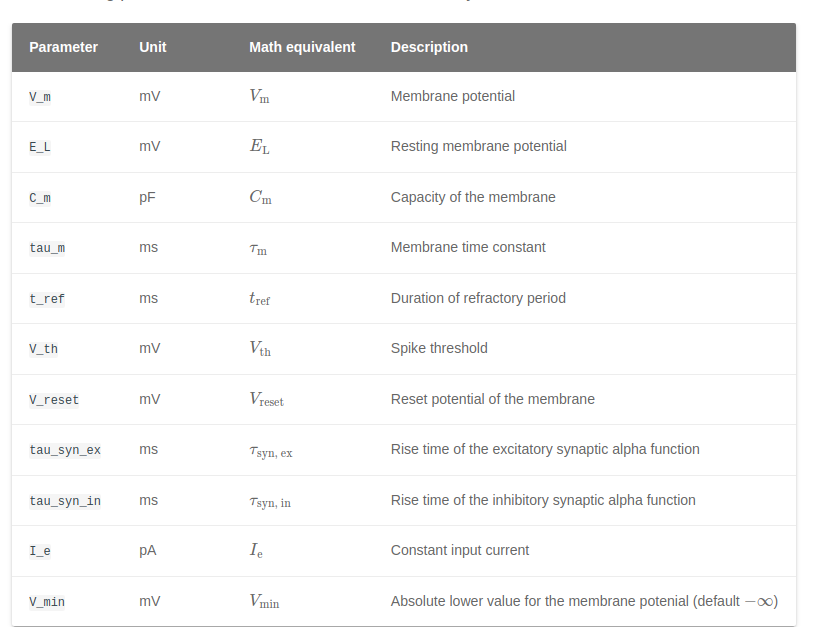

In [4]:
#Params

runtime = 200

#Pyramidal Neurons

pyr_params = {
    'E_L': -70, 
    'V_reset': -70,
    'V_th': -50,
    'tau_m': 20,
    't_ref': 2,
    'C_m' : 307.7 #C_m = tau/R with R being 65MOhms
}

#Interneurons
int_params = {
    'E_L': -57, 
    'V_reset': -57,
    'V_th': -40,
    'tau_m': 13,
    't_ref': 1,
    'C_m' :  185.6 #C_m = tau/R with R being 74MOhms
}

#Gamma rate
gamma_rate = 40

#Theta rate 
theta_rate = 7

In [5]:
#Pyramidal neurons
ca1 = nest.Create('iaf_psc_alpha', n=206, params=pyr_params)
dVms = {"V_m": ca1.get('E_L')[0] + np.random.normal((ca1.get('V_th')[0]-ca1.get('E_L')[0])/2, 3, len(ca1))}

#Inter-neurons
inter = nest.Create('iaf_psc_alpha', n=20, params=int_params)


In [6]:
#External inputs
# ec_input = nest.Create('poisson_generator')
# ec_input.set(rate=gamma_rate)
# ec_parrot = nest.Create('parrot_neuron', n=20)
# nest.Connect(ec_input, ec_parrot)

ca3_input = nest.Create('poisson_generator')
ca3_input.set(rate=gamma_rate)
ca3_parrot = nest.Create('parrot_neuron', n=20)
nest.Connect(ca3_input, ca3_parrot)

ms_input = nest.Create('poisson_generator')
ms_input.set(rate=theta_rate)
ms_parrot = nest.Create('parrot_neuron', n=10)
nest.Connect(ms_input, ms_parrot)

In [7]:
#Within-cell connections
nest.Connect(ca1, ca1, conn_spec = {'rule': 'pairwise_bernoulli', 'p': 0.2}, syn_spec={'weight': 20})
nest.Connect(inter, ca1, syn_spec={'weight': -10})

In [8]:
#Intra-cellular connections
nest.Connect(ec_parrot, ca1, syn_spec={'weight': 35})
nest.Connect(ec_parrot, inter, syn_spec={'weight': 16})
nest.Connect(ca3_parrot, ca1, syn_spec={'weight': 29})
nest.Connect(ca3_parrot, inter, syn_spec={'weight': 24})
nest.Connect(ms_parrot, inter, syn_spec={'weight': -5})

In [9]:
#Monitoring connections
Vm_recorder = nest.Create('multimeter')
Vm_recorder.set(record_from=['V_m'])
nest.Connect(Vm_recorder, ca1)
spike_recorder = nest.Create('spike_recorder')
nest.Connect(ca1, spike_recorder)

In [10]:
nest.Simulate(runtime)


Nov 23 18:16:24 NodeManager::prepare_nodes [Info]: 
    Preparing 281 nodes for simulation.

Nov 23 18:16:24 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 281
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Nov 23 18:16:24 SimulationManager::run [Info]: 
    Simulation finished.


ValueError: max() arg is an empty sequence

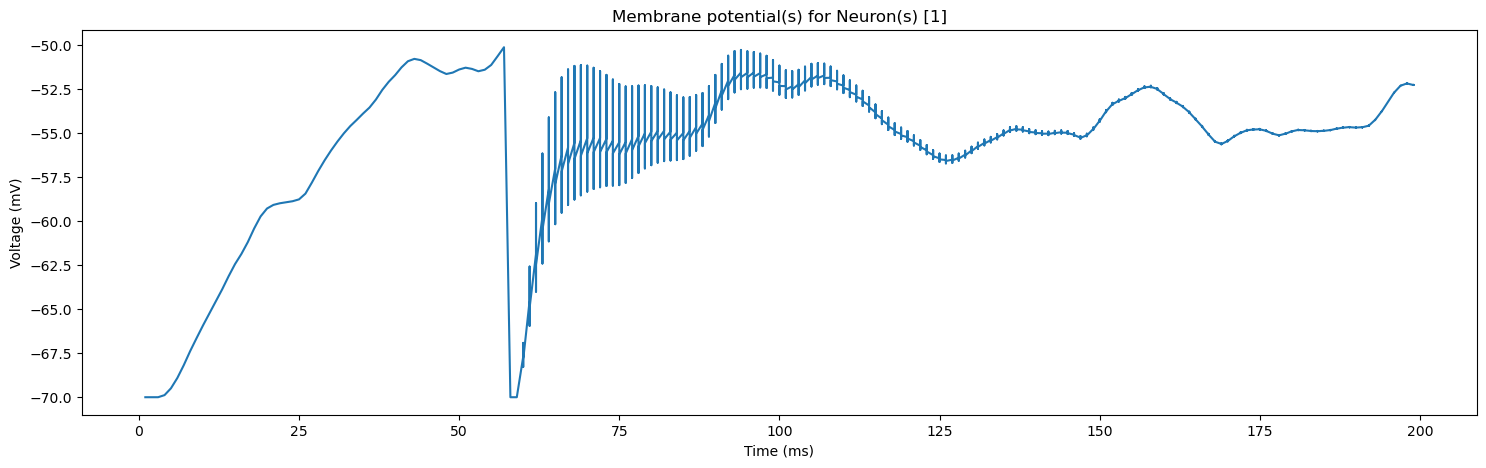

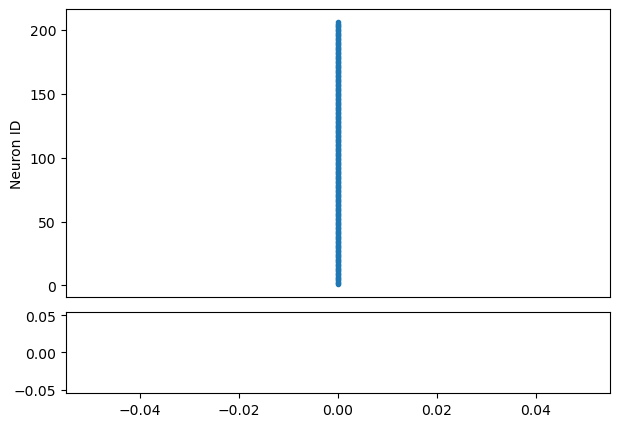

In [11]:
plot_vms_from_device(Vm_recorder, [1])
nest.raster_plot.from_device(spike_recorder)